- The python module, dgraph, shown below can be downloaded from [here](https://github.com/joyride1998/BasicsGraph/blob/master/dgraph.py).<br>
- The work log that keeped track of how I approach the anser to your question from the scratch can be browsed over [here](https://gingkoapp.com/oizdci).

[1] The complete list of edges and corresponding costs:

( a , c,   6)
( a , b,   7)
( c , d,  17)
( c , f,   2)
( b , c,  12)
( e , f,   9)
( d , e,   6)
( d , b,  13)
( f , a,  18)

[2] The adjacent verties for each single vertex in the graph:

Vertex a points to ['c', 'b']
Vertex c points to ['d', 'f']
Vertex b points to ['c']
Vertex e points to ['f']
Vertex d points to ['e', 'b']
Vertex f points to ['a']

[3] The graphical illustration of the directed graph:



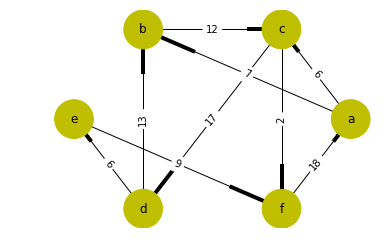

 End of Graphical illustration

[4] Show all possible path without cycles between two assigned vertices:

Example: [['a', 'c', 'd'], ['a', 'b', 'c', 'd']] from a and d

[5] Show the shortest path without cycles between two assigned vertices:

Example: ['a', 'c', 'd'] from a and d

[6] Show all possible cycles:

[['a', 'b', 'c', 'f', 'a'], ['a', 'b', 'c', 'd', 'e', 'f', 'a'], ['a', 'c', 'f', 'a'], ['a', 'c', 'd', 'e', 'f', 'a'], ['c', 'f', 'a', 'b', 'c'], ['c', 'f', 'a', 'c'], ['c', 'd', 'b', 'c'], ['c', 'd', 'e', 'f', 'a', 'b', 'c'], ['c', 'd', 'e', 'f', 'a', 'c'], ['b', 'c', 'f', 'a', 'b'], ['b', 'c', 'd', 'b'], ['b', 'c', 'd', 'e', 'f', 'a', 'b'], ['e', 'f', 'a', 'b', 'c', 'd', 'e'], ['e', 'f', 'a', 'c', 'd', 'e'], ['d', 'b', 'c', 'd'], ['d', 'e', 'f', 'a', 'b', 'c', 'd'], ['d', 'e', 'f', 'a', 'c', 'd'], ['f', 'a', 'b', 'c', 'f'], ['f', 'a', 'b', 'c', 'd', 'e', 'f'], ['f', 'a', 'c', 'f'], ['f', 'a', 'c', 'd', 'e', 'f']]


In [17]:
# dgraph.py, the file can be download from the link shown above.
# 
# 7-16-2017
# Author: Li-Pin Juan
# Reference: https://goo.gl/Kj5Q1S - Creating a generic graph class & vertex class.
#            https://goo.gl/LzHSlW - Backtracking trick in finding a path wihtout cycles.
#            https://goo.gl/yyfG3w - Visualizing network.
#            https://goo.gl/HB5Vp2 - Backtracking trick in counting cycles.

import networkx as nx
import pylab

""" ---------------------------------------------------------------------------
    The Vertex class uses a dictionary (adjacent) to keep track of the vertices 
    to which this vertex is connected, and the weight of each edge. 
    ---------------------------------------------------------------------------
""" 
class Vertex(object):
    
    # Attributes of the created object 
    def __init__(self,node):
        self.id = node # a string
        self.adjacent = {} # a dictionary comprised the weight (values) for an adjacent node (key).
    
    # Print useful info simply by calling the name (in string format) of the vertex
    def __str__(self):
        return str(self.id) + ' points to ' + str([x.id for x in self.adjacent])
    
    """ 
        Function: Collect information about weights of new adjacent vertices. 
        Details: Uses a dictionary (adjacent) to keep track of the vertices to which 
        it is connected, and the weight of each edge
    """
    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight
    
    # Returns all of the vertices in the adjacency to a "list."
    def get_connections(self):
        return self.adjacent.keys()
    
    def get_id(self):
        return self.id
    
    def get_weight(self, neighbor):
        return self.adjacent[neighbor]

    
""" ------------------------------------------------------------------------------------
    The Graph class contains a dictionary(vert-dict) that maps vertex names to 
    "vertex objects," and see the output by the __str__() method of Vertex class.
    
    Note: comment out flag no.1 below, if we want to generate directed graph
    ------------------------------------------------------------------------------------
"""    
class Graph(object):
    
    # Attributes of the object contain a dictionary(vert_dict) that maps vertex names to vertex objects.
    def __init__(self):
        self.vert_dict = {} # A dictionary comprised of "vertex objects" 
        self.num_vertices = 0
        
    # Make it easy to iterate over all the vertex "objects" in the graph object (so as to respective adjacent vertices).
    def __iter__(self):
        return iter(self.vert_dict.values())
    
    """
        Function: Add a new vertex (vertex object) to vert_dict (dictionary).
    """
    def add_vertex(self, node):
        self.num_vertices = self.num_vertices + 1
        new_vertex = Vertex(node)
        self.vert_dict[node] = new_vertex # Create a new entry in the dictionary.
        return new_vertex
        
    def add_edge(self, frm ,to, cost=0):
        if frm not in self.vert_dict:
            self.add_vertex(frm)
        if to not in self.vert_dict:
            self.add_vertex(to)
            
        self.vert_dict[frm].add_neighbor(self.vert_dict[to],cost)
        #self.vert_dict[to].add_neighbor(self.vert_dict[frm],cost) # Flag no.1
        
    # Obtain all the adjacent vertices of the input vertex.
    def get_vertex(self, n): # n: a string
        if n in self.vert_dict:
            return self.vert_dict[n]
        else:
            return None        
        
    # Obtain all the vertices consitituing the graph.    
    def get_vertices(self):
        return self.vert_dict.keys()
    
    def plot_graph(self):        
        d = {}
        for v in self:
            for w in v.get_connections():
                d[(v.get_id(),w.get_id())] = v.adjacent[w]
        # Initialize networkx object
        H = nx.DiGraph()
        for s,t in d.items():
            H.add_edges_from([s],weight=t)
        # Generate plotting parameters    
        edge_labels = d # Edges are labeld by corresponding costs (weight).
        node_labels = {node: node for node in H.nodes()} 
        values = ['y' for node in H.nodes()] # a solid circle in yellow represents a vertex.
        # A set of networkx plotting commands
        pos=nx.circular_layout(H)
        nx.draw_networkx_edge_labels(H,pos,edge_labels=edge_labels)
        nx.draw(H,pos, node_size=1500,node_color = values)
        nx.draw_networkx_labels(H,pos,labels=node_labels)
        pylab.show()
        
        return ' End of Graphical illustration'
        
        
    # Create a potential path between two vertices with cycles, start and end, in backtracking style.
    def find_path(self,start,end,path=[]):
        path = path + [start]
        if start == end: # it indicates that the program reaches the end.
            return path
        if start not in self.vert_dict: # if the starting point is not a vertex of the graph.
            return None
        # Backtracking, excluding adjacent vertices already shown
        # Here we get every adjacent nodes (values) of the object of vertex "start" (key)
        for node in self.vert_dict[start].adjacent: 
            if node.id not in path: # avoid cycles.
                # by calling the same method to generate a path, if possible
                newpath = self.find_path(node.id,end,path) 
                # if the path generated is feasible, return this as the output of the method.
                if newpath: return newpath 
    
        return None
    
    # An extension of method find_paths; returns a list of all paths (witout cycles)
    def find_all_paths(self,start,end,path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in self.vert_dict:
            return []
        paths = []
        for node in self.vert_dict[start].adjacent:
            if node.id not in path:
                newpaths = self.find_all_paths(node.id,end,path)
                for newpath in newpaths:
                    paths.append(newpath)
        
        return paths
    
    # An extension of method find_all_paths; find the shortest path without cycles. 
    def find_shortest_path(self,start,end,path=[]):
        path = path + [start]
        if start == end:
            return path
        if start not in self.vert_dict:
            return None
        shortest = None # updates across all the case in the 1st if condition below.
        for node in self.vert_dict[start].adjacent:
            if node.id not in path: # avoid cycles
                newpath = self.find_shortest_path(node.id,end,path)
                if newpath:
                    # Update takes place for cases either shortest absnets 
                    # or newpath shorter than the shortest
                    if not shortest or len(newpath)<len(shortest):
                        shortest = newpath
        
        return shortest
    
    def search_cycles(self,start,end):    
        fringe = [(start,[])]
        while fringe:
            state, path = fringe.pop()
            if path and state == end:
                yield path
                continue
            for next_state in self.vert_dict[state].adjacent:
                if next_state.id in path:
                    continue
                fringe.append((next_state.id,path+[next_state.id]))
                
    def show_all_cycles(self):
        cycles = [[node]+path for node in self.vert_dict for path in self.search_cycles(node,node)]
        return cycles
    
    def has_cycles(self):
        return ("Yes" if len(self.show_all_cycles())>0 else "No")
        
    
if __name__ == '__main__':
    
    # Initialization: create an object of Graph class, g.
    g = Graph()
    
    # The Graph class contains a dictionary(vert-dict) that maps vertex names ('a',...,'f') to vertex objects.
    g.add_vertex('a')
    g.add_vertex('b')
    g.add_vertex('c')
    g.add_vertex('d')
    g.add_vertex('e')
    g.add_vertex('f')

    # provide information on weights and edges (and related information on adjacent vertices) connected to two input vertices.
    g.add_edge('a', 'b', 7)  
    g.add_edge('a', 'c', 6)
    g.add_edge('b', 'c', 12)
    g.add_edge('c', 'd', 17)
    g.add_edge('c', 'f', 2)
    g.add_edge('d', 'b', 13)    
    g.add_edge('d', 'e', 6)
    g.add_edge('e', 'f', 9) 
    g.add_edge('f', 'a', 18)
    
    print("[1] The complete list of edges and corresponding costs:"+"\n") 
    for v in g:
        for w in v.get_connections():
            vid = v.get_id()
            wid = w.get_id()
            print '( %s , %s, %3d)'  % ( vid, wid, v.get_weight(w))

    print("\n"+"[2] The adjacent verties for each single vertex in the graph:"+"\n")
    for v in g:
        print 'Vertex %s' %(g.vert_dict[v.get_id()])    
    
    print("\n"+"[3] The graphical illustration of the directed graph:"+"\n")
    print(g.plot_graph())  

    print("\n"+"[4] Show all possible path without cycles between two assigned vertices:"+"\n")
    print 'Example: %s from %s and %s' %(g.find_all_paths('a','d'),"a","d")
    
    print("\n"+"[5] Show the shortest path without cycles between two assigned vertices:"+"\n")
    print 'Example: %s from %s and %s' %(g.find_shortest_path('a','d'),"a","d")    

    print("\n"+"[6] Show all possible cycles:"+"\n")
    print(g.show_all_cycles())
    

    
